In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import json

## Build Raw Dataset

In [2]:
df = pd.read_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Final_Toronto_Dataset.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df = df[['Prime_Rate', 'INDINF_CPI_Q', 'GDP', 'W.MTLS', 'Open',
       'Ontario_Immigrants_International', 'Toronto_median_age',
       'UT_Total_Enrolment', 'Participation_rate_toronto',
       'Employment_rate_toronto', 'Toronto_population', 'Sales_Total',
       'Avg_Price_Month', 'New Units Number (Plan for construction)',
       'New Units Number (construction complete)']]
df.dropna(inplace=True)

In [4]:
df

,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Ontario_Immigrants_International,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,
2001-01-01,7.400,2.800000,33393.91068,262.1820,2641.687163,34801.00000,36.800000,45261.0,68.6,65.0,4882618.000,528.0,185757.6686,1457.0,511.0
2001-02-01,7.250,3.274302,33414.60595,258.2500,2474.819966,37662.09142,36.820147,45261.0,68.6,64.2,4894687.054,732.0,189990.7036,946.0,227.0
2001-03-01,6.750,3.523191,33421.15412,250.7975,1999.363187,39796.62476,36.839195,45261.0,69.0,64.7,4905287.460,925.0,191476.2205,1015.0,387.0
2001-04-01,6.625,3.600000,33411.95797,247.6000,1929.581512,41662.00000,36.861226,45261.0,69.2,65.0,4916690.735,836.0,189802.6914,1503.0,1151.0
2001-05-01,6.450,3.475476,33549.86515,254.8020,2178.740467,42969.07156,36.883489,45261.0,69.6,65.4,4927393.091,958.0,191658.3372,1810.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,2.450,0.700000,45143.29965,669.8060,12605.309530,17281.00000,40.400000,82311.0,67.0,59.7,6555205.000,1551.0,625828.1154,2876.0,1903.0
2021-01-01,2.450,0.700000,45461.59117,676.4900,13195.814200,17281.00000,40.400000,83970.0,66.7,59.7,6555205.000,1703.0,624885.6230,4063.0,1018.0
2021-02-01,2.450,0.700000,45606.79326,678.0100,13733.605730,17281.00000,40.400000,83970.0,65.8,58.8,6555205.000,2167.0,676837.4998,2783.0,3929.0


In [5]:
df.columns = ['Prime_Rate', 'Inflation', 'GDP', 'Metal_Price', 'NASDAQ', 'Ontario_Immigrants_International', 'Toronto_Median_Age',
             'UT_Total_Enrollment', 'Toronto_Participation_Rate', 'Toronto_Employment_Rate', 'Toronto_Population', 
             'Total_Condo_Sold_Number', 'Avg_Price', 'New_Units_Number_Planned', 'New_Units_Number_Construction']

In [6]:
df.head()

,Prime_Rate,Inflation,GDP,Metal_Price,NASDAQ,Ontario_Immigrants_International,Toronto_Median_Age,UT_Total_Enrollment,Toronto_Participation_Rate,Toronto_Employment_Rate,Toronto_Population,Total_Condo_Sold_Number,Avg_Price,New_Units_Number_Planned,New_Units_Number_Construction
Date,,,,,,,,,,,,,,,
2001-01-01,7.400,2.800000,33393.91068,262.1820,2641.687163,34801.00000,36.800000,45261.0,68.6,65.0,4882618.000,528.0,185757.6686,1457.0,511.0
2001-02-01,7.250,3.274302,33414.60595,258.2500,2474.819966,37662.09142,36.820147,45261.0,68.6,64.2,4894687.054,732.0,189990.7036,946.0,227.0
2001-03-01,6.750,3.523191,33421.15412,250.7975,1999.363187,39796.62476,36.839195,45261.0,69.0,64.7,4905287.460,925.0,191476.2205,1015.0,387.0
2001-04-01,6.625,3.600000,33411.95797,247.6000,1929.581512,41662.00000,36.861226,45261.0,69.2,65.0,4916690.735,836.0,189802.6914,1503.0,1151.0
2001-05-01,6.450,3.475476,33549.86515,254.8020,2178.740467,42969.07156,36.883489,45261.0,69.6,65.4,4927393.091,958.0,191658.3372,1810.0,175.0


In [7]:
condo_by_area = pd.read_json(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\Condo_Info_by_Area.json")

In [8]:
condo_by_area

,Date,Area_Code,Total_Condo_Sold_Number,Avg_Price,Med_Price
0,2000-01-01,E04,8,119767,125500
1,2000-01-01,W09,14,127000,93000
2,2000-01-01,W08,15,220260,161000
3,2000-01-01,W07,2,181500,181500
4,2000-01-01,W06,8,306000,201500
...,...,...,...,...,...
8879,2021-04-01,C14,114,696269,650000
8880,2021-04-01,C15,132,633802,597450
8881,2021-04-01,E01,35,782650,735000
8882,2021-04-01,E03,15,501849,470000


In [9]:
raw_data = condo_by_area.copy()
raw_data[['Prime_Rate', 'Inflation', 'GDP', 'Metal_Price', 'NASDAQ', 'Ontario_Immigrants_International', 'Toronto_Median_Age',
             'UT_Total_Enrollment', 'Toronto_Participation_Rate', 'Toronto_Employment_Rate', 'Toronto_Population',
          'New_Units_Number_Planned', 'New_Units_Number_Construction']] = np.nan


In [10]:
df_temp = df.copy()
df_temp['Date'] = df_temp.index
df_temp['Med_Price'] = np.nan
df_temp['Area_Code'] = "All"
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp[raw_data.columns]


In [11]:
raw_data = raw_data.append(df_temp)
raw_data = raw_data.reset_index(drop=True)
raw_data['Date'] = pd.to_datetime(raw_data['Date'], infer_datetime_format=True)
raw_data = raw_data.loc[raw_data["Date"]>pd.to_datetime("2000-12-01", infer_datetime_format=True)]
raw_data = raw_data.sort_values(by=['Date'])
raw_data = raw_data.reset_index(drop=True)
raw_data

,Date,Area_Code,Total_Condo_Sold_Number,Avg_Price,Med_Price,Prime_Rate,Inflation,GDP,Metal_Price,NASDAQ,Ontario_Immigrants_International,Toronto_Median_Age,UT_Total_Enrollment,Toronto_Participation_Rate,Toronto_Employment_Rate,Toronto_Population,New_Units_Number_Planned,New_Units_Number_Construction
0,2001-01-01,E02,5.0,214180.000,229000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-01,W09,15.0,108467.000,93000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-01,W08,18.0,218839.000,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-01,W07,1.0,179500.000,179500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-01,W06,15.0,224660.000,190000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,2021-04-01,W07,4.0,827000.000,847500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8774,2021-04-01,W08,113.0,639655.000,600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8775,2021-04-01,W02,31.0,720145.000,671000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8776,2021-04-01,W03,12.0,593675.000,580000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
raw_data["Date"] = raw_data["Date"].astype("str")
raw_data = raw_data.fillna("NA")

In [13]:
# raw_data_json = raw_data.to_json(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\raw_data", orient="index")

In [14]:
# raw_data[["3_Month_Forecast","6_Month_Forecast","9_Month_Forecast","12_Month_Forecast"]] = "NA"

In [15]:
raw_data

,Date,Area_Code,Total_Condo_Sold_Number,Avg_Price,Med_Price,Prime_Rate,Inflation,GDP,Metal_Price,NASDAQ,Ontario_Immigrants_International,Toronto_Median_Age,UT_Total_Enrollment,Toronto_Participation_Rate,Toronto_Employment_Rate,Toronto_Population,New_Units_Number_Planned,New_Units_Number_Construction
0,2001-01-01,E02,5.0,214180.000,229000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,2001-01-01,W09,15.0,108467.000,93000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2001-01-01,W08,18.0,218839.000,150000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2001-01-01,W07,1.0,179500.000,179500,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2001-01-01,W06,15.0,224660.000,190000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,2021-04-01,W07,4.0,827000.000,847500,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8774,2021-04-01,W08,113.0,639655.000,600000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8775,2021-04-01,W02,31.0,720145.000,671000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8776,2021-04-01,W03,12.0,593675.000,580000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## PCA Feature Reduction

In [16]:
toronto_df = df.copy()

In [17]:
df

,Prime_Rate,Inflation,GDP,Metal_Price,NASDAQ,Ontario_Immigrants_International,Toronto_Median_Age,UT_Total_Enrollment,Toronto_Participation_Rate,Toronto_Employment_Rate,Toronto_Population,Total_Condo_Sold_Number,Avg_Price,New_Units_Number_Planned,New_Units_Number_Construction
Date,,,,,,,,,,,,,,,
2001-01-01,7.400,2.800000,33393.91068,262.1820,2641.687163,34801.00000,36.800000,45261.0,68.6,65.0,4882618.000,528.0,185757.6686,1457.0,511.0
2001-02-01,7.250,3.274302,33414.60595,258.2500,2474.819966,37662.09142,36.820147,45261.0,68.6,64.2,4894687.054,732.0,189990.7036,946.0,227.0
2001-03-01,6.750,3.523191,33421.15412,250.7975,1999.363187,39796.62476,36.839195,45261.0,69.0,64.7,4905287.460,925.0,191476.2205,1015.0,387.0
2001-04-01,6.625,3.600000,33411.95797,247.6000,1929.581512,41662.00000,36.861226,45261.0,69.2,65.0,4916690.735,836.0,189802.6914,1503.0,1151.0
2001-05-01,6.450,3.475476,33549.86515,254.8020,2178.740467,42969.07156,36.883489,45261.0,69.6,65.4,4927393.091,958.0,191658.3372,1810.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,2.450,0.700000,45143.29965,669.8060,12605.309530,17281.00000,40.400000,82311.0,67.0,59.7,6555205.000,1551.0,625828.1154,2876.0,1903.0
2021-01-01,2.450,0.700000,45461.59117,676.4900,13195.814200,17281.00000,40.400000,83970.0,66.7,59.7,6555205.000,1703.0,624885.6230,4063.0,1018.0
2021-02-01,2.450,0.700000,45606.79326,678.0100,13733.605730,17281.00000,40.400000,83970.0,65.8,58.8,6555205.000,2167.0,676837.4998,2783.0,3929.0


In [18]:
df.columns

Index(['Prime_Rate', 'Inflation', 'GDP', 'Metal_Price', 'NASDAQ',
       'Ontario_Immigrants_International', 'Toronto_Median_Age',
       'UT_Total_Enrollment', 'Toronto_Participation_Rate',
       'Toronto_Employment_Rate', 'Toronto_Population',
       'Total_Condo_Sold_Number', 'Avg_Price', 'New_Units_Number_Planned',
       'New_Units_Number_Construction'],
      dtype='object')

In [19]:
df["Date"] = df.index
df["Month"] = df.apply(lambda x: str(x["Date"]).split("-")[1], axis=1)
df["Month"] = df["Month"].astype("float64")
df.drop(columns=["Date"], inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
df_target = pd.DataFrame()
df_target["Avg_Price"] = df["Avg_Price"]
df.drop(columns = ["Avg_Price"], inplace=True)

In [22]:
df_scaled = StandardScaler().fit_transform(df)
pca = PCA(n_components=8)
df_pca = pca.fit_transform(df_scaled)

In [23]:
df_pca_fit = pd.DataFrame(data = df_pca)
df_pca_fit.head()

,0,1,2,3,4,5,6,7
0,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713
1,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008
2,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727
3,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201
4,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568


In [24]:
pca.explained_variance_ratio_

array([0.53316507, 0.09663677, 0.07166296, 0.05725705, 0.0547087 ,
       0.04624262, 0.03973268, 0.03041986])

In [25]:
df_target["Avg_Price"]
df_pca_fit.index = df_target.index
df_pca_fit["Avg_Price"] = df_target["Avg_Price"]

In [26]:
df = df_pca_fit.copy()
df["Avg_Price"] = df["Avg_Price"]/100000
df

,0,1,2,3,4,5,6,7,Avg_Price
Date,,,,,,,,,
2001-01-01,-5.372527,-1.179115,0.534767,1.337166,0.591141,2.041912,-0.596144,-0.001713,1.857577
2001-02-01,-5.420050,-1.439084,0.277248,0.985548,0.185200,1.774850,-0.773674,0.702008,1.899907
2001-03-01,-5.468533,-1.733186,0.126912,0.611624,0.079131,1.152070,-0.389307,0.923727,1.914762
2001-04-01,-5.409499,-1.910666,0.015729,0.837927,0.614817,0.732547,0.015757,0.591201,1.898027
2001-05-01,-5.486856,-2.041976,-0.423779,0.049691,0.254097,1.081129,0.226004,0.527568,1.916583
...,...,...,...,...,...,...,...,...,...
2020-12-01,4.666611,1.089440,-1.454996,-0.783678,0.873000,0.477821,-0.483692,0.204829,6.258281
2021-01-01,5.047221,-0.267351,0.585901,-0.244710,-0.164934,2.237588,0.210739,0.315483,6.248856
2021-02-01,5.923070,-0.297703,1.379302,0.202430,0.536660,0.006413,-0.094186,0.940661,6.768375


## Granger CausalityTest

In [27]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,Avg_Price_x
0_y,1.0000,0.0000,0.0011,0.0138,0.0000,0.0028,0.0000,0.0000,0.0030
1_y,0.0000,1.0000,0.0000,0.0000,0.0119,0.1540,0.0000,0.0014,0.0002
2_y,0.0005,0.0000,1.0000,0.0000,0.0000,0.0000,0.0150,0.0059,0.0107
3_y,0.0000,0.0000,0.0000,1.0000,0.0112,0.0100,0.0009,0.0309,0.0097
4_y,0.0681,0.0000,0.0000,0.0000,1.0000,0.0000,0.0326,0.0001,0.0416
5_y,0.1294,0.0000,0.0014,0.0040,0.0006,1.0000,0.0001,0.4488,0.0001
6_y,0.1194,0.0000,0.0001,0.0035,0.0001,0.2918,1.0000,0.0000,0.0497
7_y,0.0000,0.0271,0.0035,0.0000,0.0021,0.1740,0.0000,1.0000,0.1447
Avg_Price_y,0.0120,0.0000,0.0000,0.0020,0.0583,0.0006,0.0243,0.3021,1.0000


## Johansen test

In [28]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
0      ::  328.57    > 179.5199  =>   True
1      ::  218.91    > 143.6691  =>   True
2      ::  157.37    > 111.7797  =>   True
3      ::  106.05    > 83.9383   =>   True
4      ::  73.24     > 60.0627   =>   True
5      ::  44.0      > 40.1749   =>   True
6      ::  19.83     > 24.2761   =>   False
7      ::  4.88      > 12.3212   =>   False
Avg_Price ::  0.06      > 4.1296    =>   False


## Set Train and Test Datasets（54 Months 22%）

In [29]:
nobs = 54
df_train, df_test = df[0:-nobs], df[-nobs:]

print(df_train.shape) 
print(df_test.shape)  

(190, 9)
(54, 9)


## Check Stationality

In [30]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [31]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9509
 No. Lags Chosen       = 2
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.7708. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3904
 No. Lags Chosen       = 15
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.1445. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-

## Differencing

In [32]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [33]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.6388
 No. Lags Chosen       = 1
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.2219
 No. Lags Chosen       = 14
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0006. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

In [34]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [35]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1869
 No. Lags Chosen       = 7
 Critical value 1%     = -3.467
 Critical value 5%     = -2.878
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.2945
 No. Lags Chosen       = 15
 Critical value 1%     = -3.469
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test St

In [36]:
df_differenced

,0,1,2,3,4,5,6,7,Avg_Price
Date,,,,,,,,,
2001-03-01,-0.000960,-0.034133,0.107182,-0.022306,0.299873,-0.355718,0.561897,-0.482003,-0.027475
2001-04-01,0.107518,0.116623,0.039153,0.600227,0.641754,0.203257,0.020697,-0.554245,-0.031590
2001-05-01,-0.136391,0.046170,-0.328325,-1.014539,-0.896405,0.768105,-0.194817,0.268893,0.035292
2001-06-01,0.255053,0.289764,0.467168,0.433563,0.576950,-0.575395,-0.028116,-0.102090,0.003864
2001-07-01,-0.537915,0.549014,0.206041,0.266817,0.102109,-0.470565,-1.178056,-0.113820,-0.026289
...,...,...,...,...,...,...,...,...,...
2016-06-01,-0.508213,0.010023,-1.167117,-1.203872,-1.237881,2.445047,0.074336,0.108699,-0.004942
2016-07-01,-0.168417,0.536690,1.115804,1.399211,1.182665,-2.299483,-1.300073,-0.291395,-0.264090
2016-08-01,0.043199,-0.402850,-0.510283,-1.131922,-0.842090,1.063723,0.520791,0.569808,0.404653


## Select VAR Model Order

In [37]:
model = VAR(df_differenced)
x = model.select_order(maxlags=17)
x.summary()

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,-16.07,-15.91,1.044e-07,-16.01
1,-19.08,-17.42,5.201e-09,-18.40
2,-20.56,-17.42,1.184e-09,-19.29
3,-21.19,-16.56,6.469e-10,-19.31
4,-21.40,-15.28,5.399e-10,-18.92
5,-21.81,-14.21,3.802e-10,-18.73
6,-22.04,-12.95,3.309e-10,-18.35
7,-22.57,-11.98,2.235e-10,-18.27
8,-22.79,-10.72,2.148e-10,-17.89
9,-23.10,-9.542,2.006e-10,-17.60


In [38]:
model_fitted = model.fit(15)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Jun, 2021
Time:                     03:16:59
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -12.0856
Nobs:                     173.000    HQIC:                  -25.3445
Log likelihood:           1989.93    FPE:                1.63162e-13
AIC:                     -34.3956    Det(Omega_mle):     8.81878e-16
--------------------------------------------------------------------
Results for equation 0
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.003415         0.025792           -0.132           0.895
L1.0                 -0.768000         0.749519           -1.025           0.306
L1.1                  1.400972         0.820856            1.707

In [39]:
def adjust(val, length= 6): return str(val).ljust(length)

## Durbin–Watson Test

In [40]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

0      : 2.02
1      : 2.18
2      : 1.87
3      : 1.95
4      : 2.02
5      : 1.89
6      : 2.22
7      : 2.12
Avg_Price : 2.09


In [41]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

15


array([[ 9.54709374e-01, -4.89382482e-01, -5.14102938e-01,
         5.97786646e-01,  8.66426686e-01,  1.23574777e+00,
         2.98498321e+00, -9.72649152e-01,  3.61785081e-01],
       [ 8.23420947e-02,  6.12928764e-01,  1.38385255e+00,
         6.66457886e-01,  2.15462779e-01, -2.87390140e+00,
        -2.49219451e+00,  9.52670156e-01, -6.75526000e-04],
       [-9.44495603e-01, -5.28898692e-02, -9.22730593e-01,
        -1.92381408e+00, -1.98427946e+00,  1.80789452e+00,
        -1.04986415e+00,  7.04220159e-01, -2.38263759e-01],
       [ 6.04571630e-01, -4.06595612e-01,  3.07815737e-01,
         1.51240961e+00,  1.93369922e+00, -5.31430092e-01,
         1.66627417e+00, -1.13133106e+00,  2.03341030e-01],
       [-6.79502575e-01,  5.22071590e-01,  9.79284573e-01,
         3.31216922e-01,  4.23028651e-02, -2.19220310e+00,
        -2.64475854e+00,  5.22253683e-01, -2.37516786e-01],
       [ 6.51947116e-01, -1.67078987e+00,  1.56313297e+00,
         2.76834318e-01, -1.42803313e+00,  3.478757

In [42]:
col_list = list()
for col in df.columns:
    col_list.append(str(col))
df.columns = col_list 

In [43]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_2d
Date,,,,,,,,,
2016-11-01,-1.210798,0.250274,0.303088,-0.450398,-0.425847,-0.868574,-1.787354,0.208398,-0.295274
2016-12-01,0.782173,0.096889,0.437004,0.992298,1.018055,-0.335904,0.587674,-0.719257,0.332758
2017-01-01,-0.032274,-1.202036,1.424082,-0.975298,-2.563400,4.367316,-0.202448,0.733127,-0.182974
2017-02-01,0.651217,0.298947,-1.049526,-0.067080,2.791896,-5.405943,2.058303,-1.138475,0.180952
2017-03-01,-0.139431,0.388022,-0.543773,0.007373,-0.035605,1.850931,-0.299780,-0.007871,-0.149590
2017-04-01,-1.195069,0.579155,-0.069935,-1.133575,-1.633065,-0.185292,-2.673149,1.400411,-0.094281
2017-05-01,0.672105,-0.301321,0.657464,2.422300,2.299450,-1.920625,1.212226,-0.648066,0.002788
2017-06-01,-0.349714,0.018715,-2.572172,-2.062138,-3.121815,5.437227,0.765968,0.378393,0.302264
2017-07-01,0.291388,-0.175549,1.849556,1.798364,2.142803,-4.731575,-0.095998,-0.602650,-0.122892


In [44]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [45]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results

,0_2d,1_2d,2_2d,3_2d,4_2d,5_2d,6_2d,7_2d,Avg_Price_2d,0_1d,...,4_1d,4_forecast,5_1d,5_forecast,6_1d,6_forecast,7_1d,7_forecast,Avg_Price_1d,Avg_Price_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-01,-1.210798,0.250274,0.303088,-0.450398,-0.425847,-0.868574,-1.787354,0.208398,-0.295274,-0.828928,...,-0.380690,0.238560,-0.394202,-1.436483,-0.949105,-0.229915,0.278313,1.050943,-0.166224,4.425765
2016-12-01,0.782173,0.096889,0.437004,0.992298,1.018055,-0.335904,0.587674,-0.719257,0.332758,-0.046755,...,0.637365,0.875925,-0.730106,-2.166589,-0.361431,-0.591346,-0.440944,0.609999,0.166534,4.592299
2017-01-01,-0.032274,-1.202036,1.424082,-0.975298,-2.563400,4.367316,-0.202448,0.733127,-0.182974,-0.079029,...,-1.926035,-1.050111,3.637210,1.470621,-0.563879,-1.155224,0.292183,0.902181,-0.016439,4.575860
2017-02-01,0.651217,0.298947,-1.049526,-0.067080,2.791896,-5.405943,2.058303,-1.138475,0.180952,0.572188,...,0.865861,-0.184250,-1.768733,-0.298112,1.494425,0.339200,-0.846292,0.055889,0.164513,4.740373
2017-03-01,-0.139431,0.388022,-0.543773,0.007373,-0.035605,1.850931,-0.299780,-0.007871,-0.149590,0.432757,...,0.830256,0.646006,0.082199,-0.215913,1.194644,1.533845,-0.854163,-0.798273,0.014923,4.755296
2017-04-01,-1.195069,0.579155,-0.069935,-1.133575,-1.633065,-0.185292,-2.673149,1.400411,-0.094281,-0.762312,...,-0.802809,-0.156803,-0.103093,-0.319006,-1.478504,0.055340,0.546249,-0.252025,-0.079359,4.675937
2017-05-01,0.672105,-0.301321,0.657464,2.422300,2.299450,-1.920625,1.212226,-0.648066,0.002788,-0.090208,...,1.496641,1.339838,-2.023718,-2.342724,-0.266278,-0.210938,-0.101817,-0.353842,-0.076571,4.599366
2017-06-01,-0.349714,0.018715,-2.572172,-2.062138,-3.121815,5.437227,0.765968,0.378393,0.302264,-0.439922,...,-1.625174,-0.285337,3.413509,1.070785,0.499690,0.288752,0.276576,-0.077266,0.225694,4.825060
2017-07-01,0.291388,-0.175549,1.849556,1.798364,2.142803,-4.731575,-0.095998,-0.602650,-0.122892,-0.148534,...,0.517628,0.232291,-1.318066,-0.247281,0.403692,0.692445,-0.326074,-0.403340,0.102802,4.927861


In [46]:
col_list = list()
for col in df_test.columns:
    col_list.append(str(col))
df_test.columns = col_list 

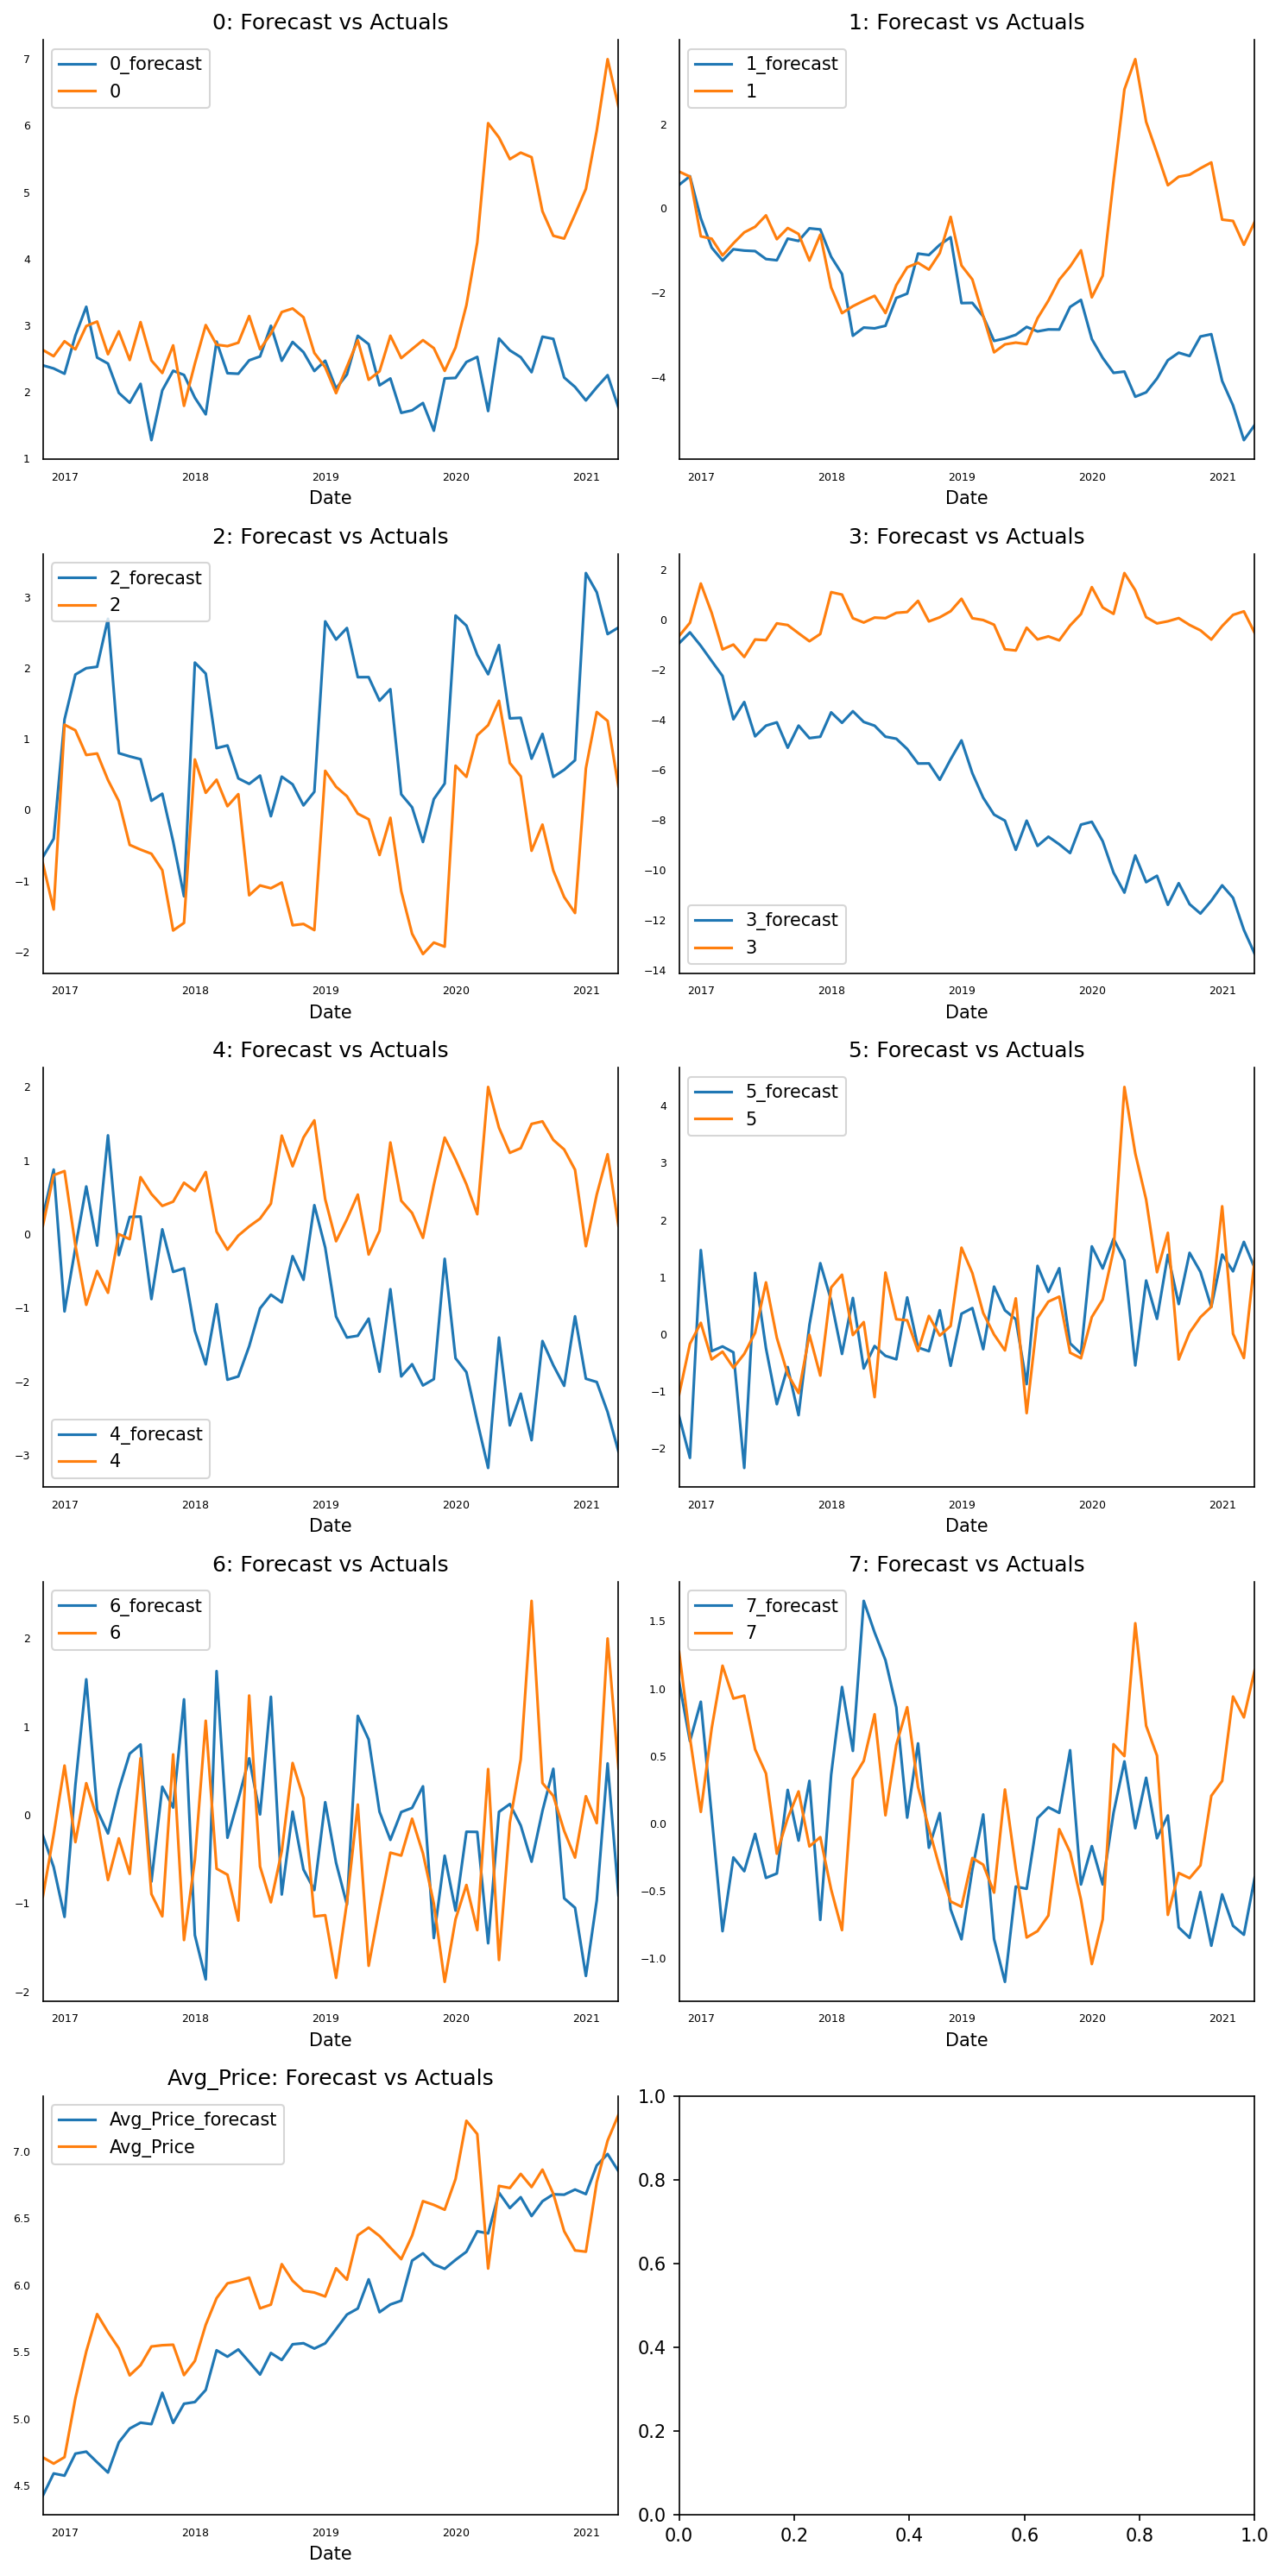

In [47]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, dpi=150, figsize=(10,20))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [48]:
df_final = df_results[['Avg_Price_forecast']].join(df_test[["Avg_Price"]])
df_final = df_final*100000
df_final

,Avg_Price_forecast,Avg_Price
Date,,
2016-11-01,442576.542074,471255.8475
2016-12-01,459229.949219,466591.6502
2017-01-01,457586.001531,471409.2907
2017-02-01,474037.276497,515424.0901
2017-03-01,475529.551732,550299.4484
2017-04-01,467593.690340,578279.6443
2017-05-01,459936.608488,564807.5358
2017-06-01,482505.962321,552679.1163
2017-07-01,492786.127471,532501.9822


A forecast method that minimises the MAE will lead to forecasts of the median, while minimising the RMSE will lead to forecasts of the mean.

In [49]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_final["Avg_Price"], df_final["Avg_Price_forecast"])
print('MAE: %f' % mae)

MAE: 42180.531871


In [50]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_final["Avg_Price"], df_final["Avg_Price_forecast"])
print('MSE: %f' % mse)

MSE: 2314894911.948601


In [51]:
# Root Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(df_final["Avg_Price"], df_final["Avg_Price_forecast"])
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 48113.354819


In [52]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [53]:
mape = MAPE(df_final["Avg_Price"], df_final["Avg_Price_forecast"])
print(f"MAPE: {mape:.2f}%")

MAPE: 7.00%


## Forecast Evaluation (1-12 Months)

Use 2018-05-01 to 2019-04-01 as current date to forecast the average condo price in Toronto area (1-12 months)

In [54]:
toronto_df["Date"] = toronto_df.index
toronto_df["Month"] = toronto_df.apply(lambda x: str(x["Date"]).split("-")[1], axis=1)
toronto_df["Month"] = toronto_df["Month"].astype("float64")
toronto_df.drop(columns=["Date"], inplace=True)

In [55]:
def VAR_forecast(data_df, starting_point, test_max_size = 12, lags = 15, n_tests = 12, steps = 12, PCA_n_components = 8):
    df = data_df.copy()
    df_size = len(df)
    df_target = pd.DataFrame()
    df_target["Avg_Price"] = df["Avg_Price"]
    df.drop(columns = ["Avg_Price"], inplace=True)
    df_scaled = StandardScaler().fit_transform(df)
    pca = PCA(n_components=PCA_n_components)
    df_pca = pca.fit_transform(df_scaled)
    df_pca_fit = pd.DataFrame(data = df_pca)
    df_pca_fit.index = df_target.index
    df_pca_fit["Avg_Price"] = df_target["Avg_Price"]
    df = df_pca_fit.copy()
    df["Avg_Price"] = df["Avg_Price"]/100000
#     display(df)

    df_train = df[starting_point:df_size-(test_max_size+(n_tests-starting_point))+1]
    df_test = df[df_size-(test_max_size+(n_tests-starting_point))+1:df_size-(n_tests-starting_point)+1]
#     display(df_train)
#     display(df_test)
    
    print(f"Train data: {starting_point}:{df_size-(test_max_size+(n_tests-starting_point))}")
    print(f"Test data: {df_size-(test_max_size+(n_tests-starting_point))}:{df_size-(n_tests-starting_point)}")    
#     print(f"{df_size-(test_max_size+(n_tests-starting_point))+1}")
#     print(f"{df_size-(n_tests-starting_point)+1}")
    
    df_differenced = df_train.diff().dropna()
    df_differenced = df_differenced.diff().dropna()
#     display(df_differenced)
    
    model = VAR(df_differenced)
    model_fitted = model.fit(lags)
    lag_order = model_fitted.k_ar
    forecast_input = df_differenced.values[-lag_order:]
    
    print(f"Number of lags: {lags}")
    
    col_list = list()
    for col in df.columns:
        col_list.append(str(col))
    df.columns = col_list 
    #Forecast
    fc = model_fitted.forecast(y=forecast_input, steps=steps)
    df_forecast = pd.DataFrame(fc, index=df.index[df_size-(test_max_size+(n_tests-starting_point))+1:df_size-(n_tests-starting_point)+1], 
                               columns=df.columns + '_2d')
#     display(df_forecast)
    
    df_results = invert_transformation(df_train, df_forecast, second_diff=True)   
    
    col_list = list()
    for col in df_test.columns:
        col_list.append(str(col))
    df_test.columns = col_list 
    
    df_final = df_results[['Avg_Price_forecast']].join(df_test[["Avg_Price"]])
#     display(df_final)
    
#     fig, axes = plt.subplots(dpi=150, figsize=(5,3))
# #     (col,ax) = (zip(df.columns, axes.flatten()))
#     df_results["Avg_Price"+'_forecast'].plot(legend=True, ax=axes).autoscale(axis='x',tight=True)
#     df_test["Avg_Price"].plot(legend=True, ax=axes);
#     ax.set_title("Avg_Price" + ": Forecast vs Actuals")
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

#     plt.tight_layout();
    
    df_final = df_final*100000
    
    print("=========================")
    
    return df_final

In [56]:
df_final = VAR_forecast(toronto_df.iloc[:-13,:], 11)

Train data: 11:218
Test data: 218:230
Number of lags: 15


C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [57]:
test_max_size = 12
test_point = [3,6,9,12]
cross_validation_list = []

cross_validation_df = pd.DataFrame(index=range(test_max_size))

for col in test_point:
    cross_validation_df["MAE"+str(col)] = np.nan
    cross_validation_df["MSE"+str(col)] = np.nan
    cross_validation_df["RMSE"+str(col)] = np.nan
    cross_validation_df["MAPE"+str(col)] = np.nan


for i in range(test_max_size):
    df_final = VAR_forecast(toronto_df.iloc[:-13,:], i)
    cross_validation_list.append(df_final)
    
    for j in test_point:
        mae = mean_absolute_error(df_final["Avg_Price"][0:j], df_final["Avg_Price_forecast"][0:j])
        mse = mean_squared_error(df_final["Avg_Price"][0:j], df_final["Avg_Price_forecast"][0:j])
        rmse = sqrt(mse)
        mape = MAPE(df_final["Avg_Price"][0:j], df_final["Avg_Price_forecast"][0:j])
        cross_validation_df.loc[i,"MAE"+str(j)] = mae
        cross_validation_df.loc[i,"MSE"+str(j)] = mse
        cross_validation_df.loc[i,"RMSE"+str(j)] = rmse
        cross_validation_df.loc[i,"MAPE"+str(j)] = mape
    
    

Train data: 0:207
Test data: 207:219
Number of lags: 15
Train data: 1:208
Test data: 208:220
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Train data: 2:209
Test data: 209:221
Number of lags: 15
Train data: 3:210
Test data: 210:222
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Train data: 4:211
Test data: 211:223
Number of lags: 15
Train data: 5:212
Test data: 212:224
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Train data: 6:213
Test data: 213:225
Number of lags: 15
Train data: 7:214
Test data: 214:226
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Train data: 8:215
Test data: 215:227
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Train data: 9:216

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Test data: 216:228
Number of lags: 15
Train data: 10:217
Test data: 217:229
Number of lags: 15
Train data: 11:218
Test data: 218:230
Number of lags: 15


C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [58]:
cross_validation_df.mean()

MAE3      1.630933e+04
MSE3      3.865039e+08
RMSE3     1.768053e+04
MAPE3     2.700721e+00
MAE6      2.090837e+04
MSE6      6.254775e+08
RMSE6     2.326902e+04
MAPE6     3.425235e+00
MAE9      2.499592e+04
MSE9      8.681212e+08
RMSE9     2.783395e+04
MAPE9     4.058248e+00
MAE12     2.690264e+04
MSE12     9.847355e+08
RMSE12    3.001851e+04
MAPE12    4.304039e+00
dtype: float64

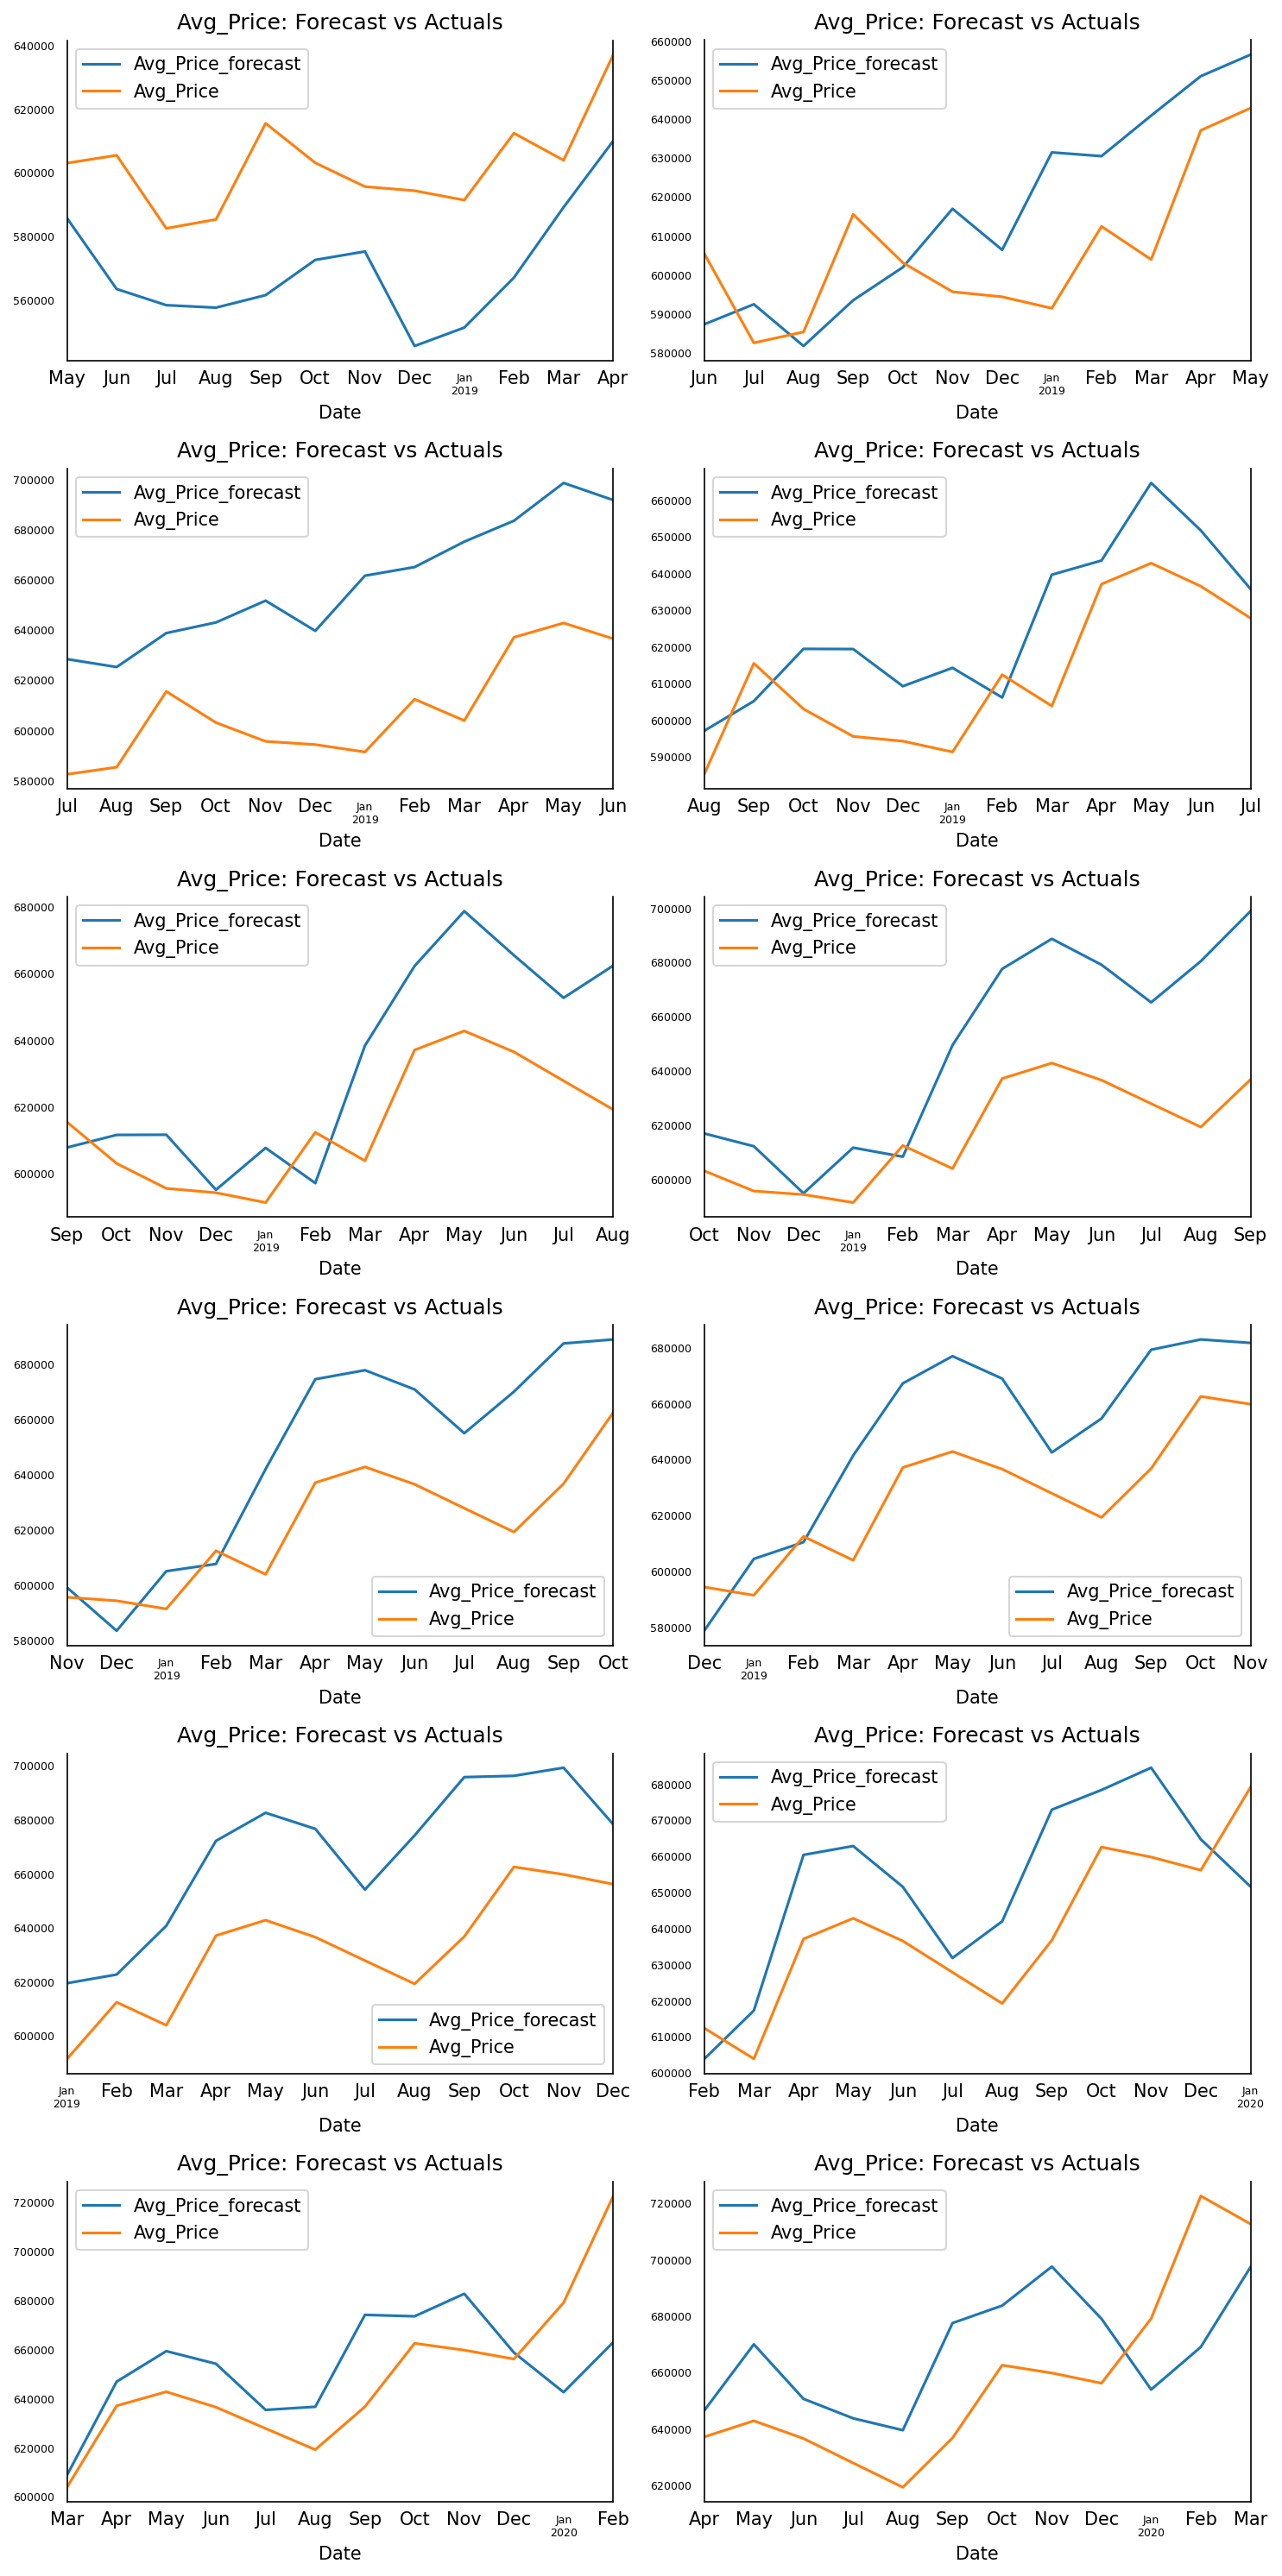

In [59]:
fig, axes = plt.subplots(nrows=int(len(cross_validation_list)/2), ncols=2, dpi=150, figsize=(10,20))
for i, (data,ax) in enumerate(zip(cross_validation_list, axes.flatten())):
# for i, data in enumerate(cross_validation_list):
    data['Avg_Price_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    data['Avg_Price'].plot(legend=True, ax=ax);
    ax.set_title('Avg_Price' + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

<AxesSubplot:>

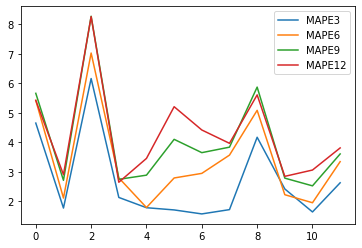

In [60]:
cross_validation_df[['MAPE3','MAPE6','MAPE9','MAPE12']].plot()

<AxesSubplot:>

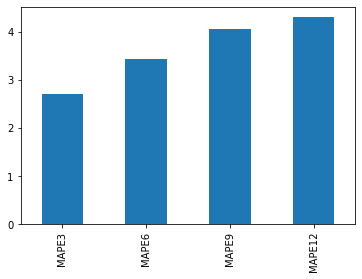

In [61]:
cross_validation_df[['MAPE3','MAPE6','MAPE9','MAPE12']].mean().plot.bar()

Use 2018-09-01 to 2019-08-01 as current date to forecast the average condo price in Toronto area (1-12 months)

In [62]:
test_max_size = 12
test_point = [3,6,9,12]
cross_validation_list = []

cross_validation_df = pd.DataFrame(index=range(test_max_size))

for col in test_point:
    cross_validation_df["MAE"+str(col)] = np.nan
    cross_validation_df["MSE"+str(col)] = np.nan
    cross_validation_df["RMSE"+str(col)] = np.nan
    cross_validation_df["MAPE"+str(col)] = np.nan


for i in range(test_max_size):
    df_final = VAR_forecast(toronto_df.iloc[:-9,:], i)
    cross_validation_list.append(df_final)
    
    for j in test_point:
        mae = mean_absolute_error(df_final["Avg_Price"][0:j], df_final["Avg_Price_forecast"][0:j])
        mse = mean_squared_error(df_final["Avg_Price"][0:j], df_final["Avg_Price_forecast"][0:j])
        rmse = sqrt(mse)
        mape = MAPE(df_final["Avg_Price"][0:j], df_final["Avg_Price_forecast"][0:j])
        cross_validation_df.loc[i,"MAE"+str(j)] = mae
        cross_validation_df.loc[i,"MSE"+str(j)] = mse
        cross_validation_df.loc[i,"RMSE"+str(j)] = rmse
        cross_validation_df.loc[i,"MAPE"+str(j)] = mape

Train data: 0:211
Test data: 211:223
Number of lags: 15
Train data: 1:212
Test data: 212:224
Number of lags: 15
Train data: 2:213
Test data: 213:225
Number of lags: 15
Train data: 3:214
Test data: 214:226
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Train data: 4:215
Test data: 215:227
Number of lags: 15
Train data: 5:216
Test data: 216:228
Number of lags: 15
Train data: 6:217
Test data: 217:229
Number of lags: 15
Train data: 7:218
Test data: 218:230
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Train data: 8:219
Test data: 219:231
Number of lags: 15
Train data: 9:220
Test data: 220:232
Number of lags: 15
Train data: 10:221
Test data: 221:233
Number of lags: 15
Train data: 11:222
Test data: 222:234
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [63]:
cross_validation_df.mean()

MAE3      1.460811e+04
MSE3      3.056907e+08
RMSE3     1.643234e+04
MAPE3     2.359632e+00
MAE6      1.824130e+04
MSE6      4.837223e+08
RMSE6     2.120016e+04
MAPE6     2.904269e+00
MAE9      2.392122e+04
MSE9      9.747284e+08
RMSE9     2.876712e+04
MAPE9     3.698993e+00
MAE12     2.563410e+04
MSE12     1.036320e+09
RMSE12    3.089984e+04
MAPE12    3.936616e+00
dtype: float64

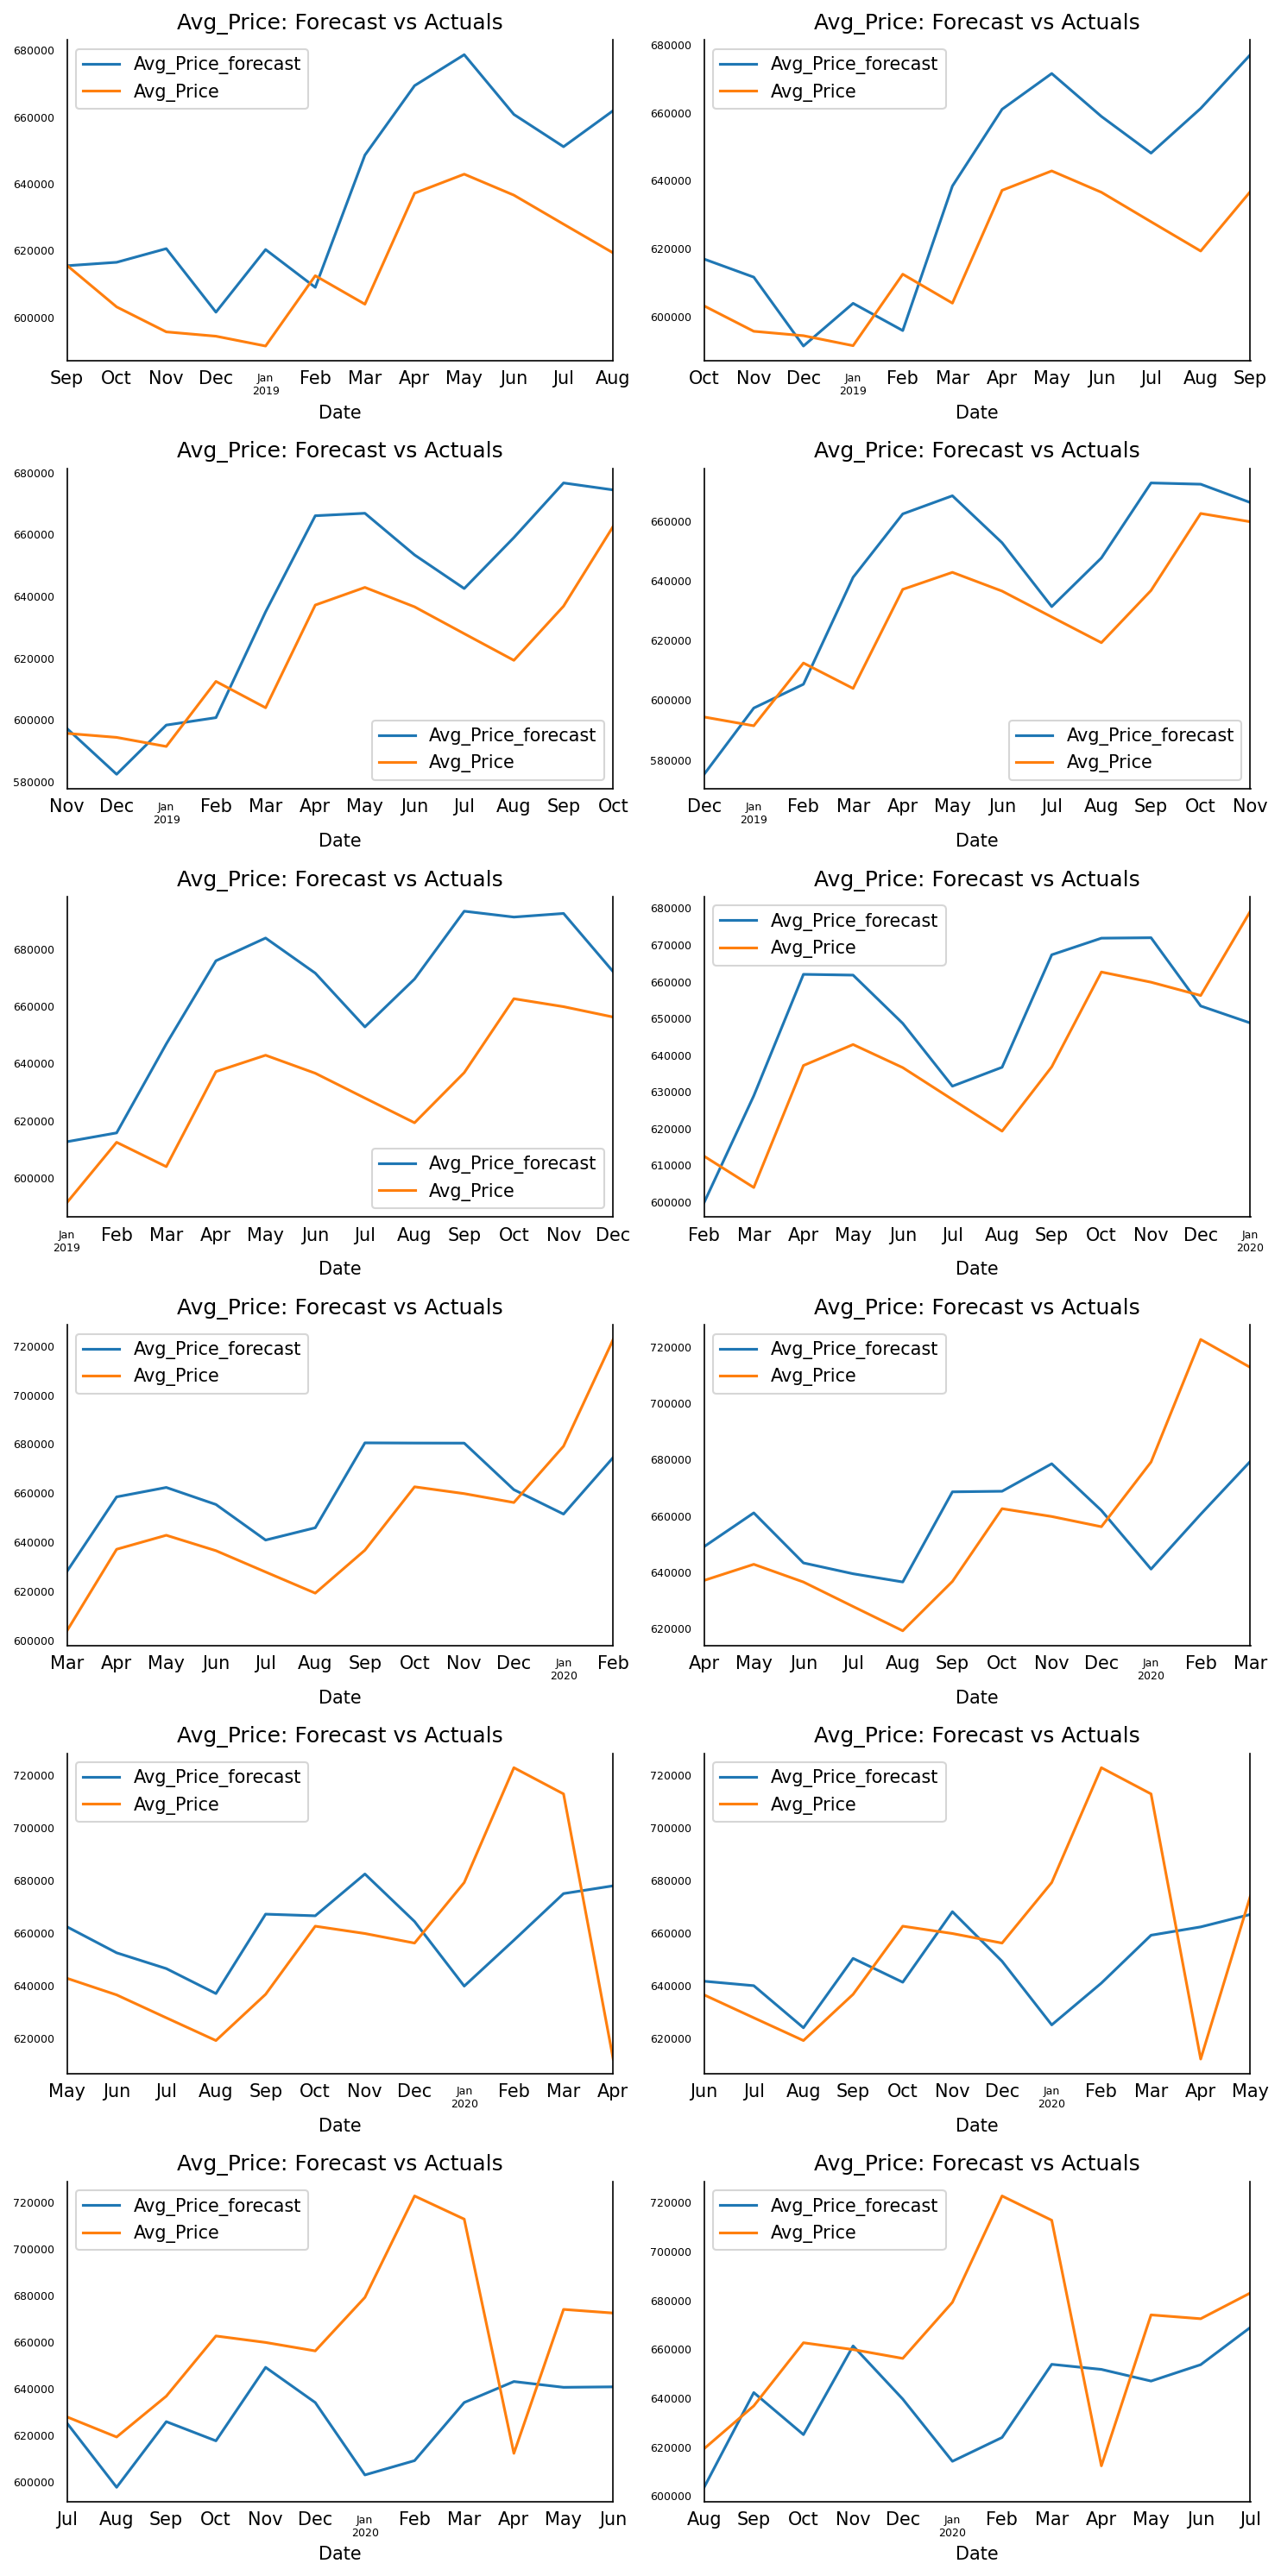

In [64]:
fig, axes = plt.subplots(nrows=int(len(cross_validation_list)/2), ncols=2, dpi=150, figsize=(10,20))
for i, (data,ax) in enumerate(zip(cross_validation_list, axes.flatten())):
# for i, data in enumerate(cross_validation_list):
    data['Avg_Price_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    data['Avg_Price'].plot(legend=True, ax=ax);
    ax.set_title('Avg_Price' + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

<AxesSubplot:>

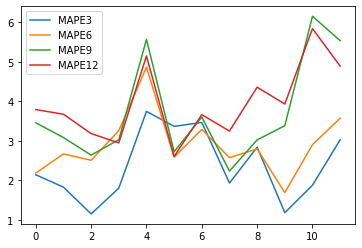

In [65]:
cross_validation_df[['MAPE3','MAPE6','MAPE9','MAPE12']].plot()

<AxesSubplot:>

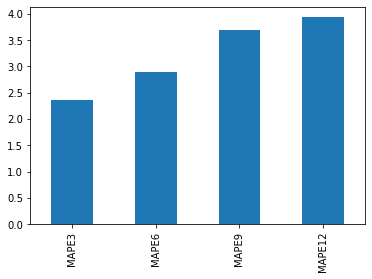

In [66]:
cross_validation_df[['MAPE3','MAPE6','MAPE9','MAPE12']].mean().plot.bar()

## Forecast

In [67]:
raw_data

,Date,Area_Code,Total_Condo_Sold_Number,Avg_Price,Med_Price,Prime_Rate,Inflation,GDP,Metal_Price,NASDAQ,Ontario_Immigrants_International,Toronto_Median_Age,UT_Total_Enrollment,Toronto_Participation_Rate,Toronto_Employment_Rate,Toronto_Population,New_Units_Number_Planned,New_Units_Number_Construction
0,2001-01-01,E02,5.0,214180.000,229000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,2001-01-01,W09,15.0,108467.000,93000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2001-01-01,W08,18.0,218839.000,150000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2001-01-01,W07,1.0,179500.000,179500,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2001-01-01,W06,15.0,224660.000,190000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,2021-04-01,W07,4.0,827000.000,847500,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8774,2021-04-01,W08,113.0,639655.000,600000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8775,2021-04-01,W02,31.0,720145.000,671000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8776,2021-04-01,W03,12.0,593675.000,580000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [68]:
for index, row in raw_data.iterrows():
    if row['Area_Code'] != "All":
        raw_data.loc[index, ['Prime_Rate', 'Inflation', 'GDP', 'Metal_Price', 'NASDAQ',
           'Ontario_Immigrants_International', 'Toronto_Median_Age', 'UT_Total_Enrollment', 'Toronto_Participation_Rate',
           'Toronto_Employment_Rate', 'Toronto_Population', 'New_Units_Number_Planned', 'New_Units_Number_Construction']] = toronto_df.loc[row["Date"], ['Prime_Rate', 'Inflation', 'GDP', 'Metal_Price', 'NASDAQ',
           'Ontario_Immigrants_International', 'Toronto_Median_Age', 'UT_Total_Enrollment', 'Toronto_Participation_Rate',
           'Toronto_Employment_Rate', 'Toronto_Population', 'New_Units_Number_Planned', 'New_Units_Number_Construction']]
    else:
        continue

In [69]:
# area_code = raw_data["Area_Code"].unique().tolist()

In [70]:
# for area in area_code:
#     raw_data.loc[raw_data["Area_Code"]==area,['Prime_Rate', 'Inflation', 'GDP', 'Metal_Price', 'NASDAQ',
#        'Ontario_Immigrants_International', 'Toronto_Median_Age', 'UT_Total_Enrollment', 'Toronto_Participation_Rate',
#        'Toronto_Employment_Rate', 'Toronto_Population', 'New_Units_Number_Planned', 'New_Units_Number_Construction']]=raw_data.loc[raw_data["Area_Code"]=="All",['Prime_Rate', 'Inflation', 'GDP', 'Metal_Price', 'NASDAQ',
#        'Ontario_Immigrants_International', 'Toronto_Median_Age', 'UT_Total_Enrollment', 'Toronto_Participation_Rate',
#        'Toronto_Employment_Rate', 'Toronto_Population', 'New_Units_Number_Planned', 'New_Units_Number_Construction']].set_index(raw_data.loc[raw_data["Area_Code"]==area].index)

In [71]:
raw_data_json = raw_data.to_json(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\raw_data", orient="index")

In [72]:
def VAR_forecast_future(data_df, forecast_time_list, lags = 15, steps = 12, PCA_n_components = 8):
    df = data_df.copy()
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    df["Month"] = df.apply(lambda x: str(x["Date"]).split("-")[1], axis=1)
    df["Month"] = df["Month"].astype("float64")
    df.set_index('Date',inplace=True)
#     display(df)
    df.drop(columns=['Area_Code', 'Med_Price'], inplace=True)
#     display(df)

    df_size = len(df)
    df_target = pd.DataFrame()
    df_target["Avg_Price"] = df["Avg_Price"]
    df.drop(columns = ["Avg_Price"], inplace=True)
#     display(df)
    df_scaled = StandardScaler().fit_transform(df)
    pca = PCA(n_components=PCA_n_components)
    df_pca = pca.fit_transform(df_scaled)
    df_pca_fit = pd.DataFrame(data = df_pca)
    df_pca_fit.index = df_target.index
    df_pca_fit["Avg_Price"] = df_target["Avg_Price"]
    df = df_pca_fit.copy()
    df["Avg_Price"] = df["Avg_Price"]/100000
#     display(df)

    df_train = df
#     display(df_train)

    
    df_differenced = df_train.diff().dropna()
    df_differenced = df_differenced.diff().dropna()
#     display(df_differenced)
    
    model = VAR(df_differenced)
    model_fitted = model.fit(lags)
    lag_order = model_fitted.k_ar
    forecast_input = df_differenced.values[-lag_order:]
    
    print(f"Number of lags: {lags}")
    
    col_list = list()
    for col in df.columns:
        col_list.append(str(col))
    df.columns = col_list 
    #Forecast
    fc = model_fitted.forecast(y=forecast_input, steps=steps)
    df_forecast = pd.DataFrame(fc, index=forecast_time_list, 
                               columns=df.columns + '_2d')
#     display(df_forecast)
    
    df_results = invert_transformation(df_train, df_forecast, second_diff=True)   
    
#     col_list = list()
#     for col in df_test.columns:
#         col_list.append(str(col))
#     df_test.columns = col_list 
    
#     display(df_final)
    
#     fig, axes = plt.subplots(dpi=150, figsize=(5,3))
# #     (col,ax) = (zip(df.columns, axes.flatten()))
#     df_results["Avg_Price"+'_forecast'].plot(legend=True, ax=axes).autoscale(axis='x',tight=True)
#     ax.set_title("Avg_Price" + ": Forecast vs Actuals")
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

#     plt.tight_layout();
    
    df_results = df_results['Avg_Price_forecast']*100000
    
    print("=========================")
    
    return df_results

In [73]:
forecast_time_list = ["2021-05",
                     '2021-06',
                     '2021-07',
                     '2021-08',
                     '2021-09',
                     '2021-10',
                     '2021-11',
                     '2021-12',
                     '2022-01',
                     '2022-02',
                     '2022-03',
                     '2022-04',
                     '2022-05',
                     '2022-06',
                     '2022-07',
                     '2022-08',
                     '2022-09',
                     '2022-10',
                     '2022-11',
                     '2022-12',
                     '2023-01',
                     '2023-02',
                     '2023-03',
                     '2023-04',
                     '2023-05',
                     '2023-06',
                     '2023-07',
                     '2023-08',
                     '2023-09',
                     '2023-10',
                     '2023-11',
                     '2023-12',
                     '2024-01',
                     '2024-02',
                     '2024-03',
                     '2024-04',
                     '2024-05',]

In [74]:
forecast_time_list = pd.to_datetime(forecast_time_list, infer_datetime_format=True)

In [75]:
area_code = raw_data["Area_Code"].unique().tolist()

In [76]:
forecast = pd.DataFrame(index=forecast_time_list)
for area in area_code:
    forecast_future_df = VAR_forecast_future(raw_data.loc[raw_data["Area_Code"]==area], forecast_time_list, steps = 37)
    forecast[area]=forecast_future_df

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Number of lags: 15
Number of lags: 15
Number of lags: 15


C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq

Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15


C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Number of lags: 15
Number of lags: 15
Number of lags: 15


C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15


C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Number of lags: 15
Number of lags: 15
Number of lags: 15
Number of lags: 15

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



Number of lags: 15
Number of lags: 15


<AxesSubplot:>

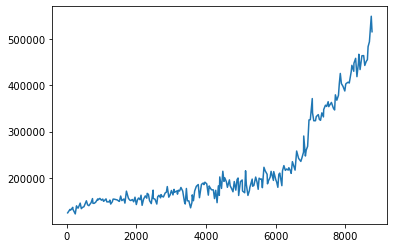

In [77]:
raw_data.loc[raw_data["Area_Code"]=='E04']['Avg_Price'].plot()

<AxesSubplot:>

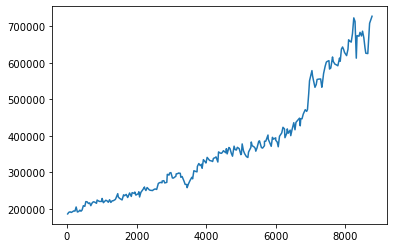

In [78]:
raw_data.loc[raw_data["Area_Code"]=="All"]['Avg_Price'].plot()

In [87]:
forecast

,E02,W09,W08,W07,W06,E06,W05,W03,W01,E11,...,C10,E07,C08,C07,C06,C04,E04,C11,E05,C09
2021-05-01,1.076034e+06,726355.644184,748659.038659,7.282293e+05,739560.116141,1.082308e+06,532285.919771,510309.648499,7.401822e+05,512472.760192,...,9.344279e+05,554976.661538,720436.645299,770307.639027,523480.875073,1.228116e+06,535179.652279,680127.681128,530027.057452,2.949293e+06
2021-06-01,7.512309e+05,825533.866147,702561.493363,1.299491e+06,769130.444083,7.977926e+05,466272.145874,196514.101794,6.883241e+05,516356.083543,...,9.024295e+05,534895.034826,742943.974421,752252.270492,581748.076611,9.288356e+05,505649.861014,642985.440892,503144.561082,1.538678e+06
2021-07-01,5.675295e+05,457835.561491,603166.581835,5.065921e+05,727061.604979,5.557302e+05,490458.229373,585803.338228,8.521938e+05,514162.443888,...,8.926339e+05,525935.390962,739609.095495,656662.728731,726768.799219,7.347959e+05,523698.131601,516835.622705,487394.512808,7.047205e+05
2021-08-01,5.754530e+05,427927.802806,585678.291297,4.882678e+05,676167.969648,4.393399e+05,555207.338778,476405.140399,8.238070e+05,479088.720064,...,8.187410e+05,543633.243239,791245.539227,634251.105136,677960.510200,9.918384e+05,487799.635923,619735.035646,594747.012852,1.171728e+06
2021-09-01,9.619208e+05,552915.424501,562933.813729,8.978062e+05,755419.922395,8.827492e+05,482844.980735,774990.692181,7.572304e+05,467360.259984,...,8.136630e+05,540319.292497,788923.046368,656491.110374,691502.808888,1.142689e+06,530799.638673,691041.223044,582855.516481,6.585364e+05
2021-10-01,1.101414e+06,544083.466264,599224.527694,6.597921e+05,810740.384577,1.019867e+06,474021.736085,393057.638439,5.820362e+05,518270.550398,...,8.104859e+05,536865.575609,783328.231792,659610.294197,611717.522942,9.177343e+05,531577.494913,681129.450253,534135.234547,2.195523e+06
2021-11-01,1.003883e+06,501739.716341,648018.875520,5.007967e+05,740767.982618,8.662360e+05,558607.646791,236019.646997,6.417991e+05,503970.421856,...,7.840417e+05,522320.315036,774702.874269,636582.969519,603456.065623,9.272833e+05,519292.217343,647668.243692,500894.164043,1.553231e+06
2021-12-01,8.301502e+05,533732.839665,559596.282335,4.965780e+05,707988.646358,9.832672e+05,540672.417566,596861.301935,7.401665e+05,536165.093919,...,8.816110e+05,524976.352416,701386.999600,656009.873834,555264.909602,1.111907e+06,565674.273593,631381.366533,515269.595761,1.285871e+06
2022-01-01,9.455602e+05,635655.968377,657473.503479,9.855431e+05,728845.639434,8.328248e+05,520415.802182,591365.075410,8.067663e+05,515917.483771,...,7.568440e+05,518158.459306,727780.079310,640424.575186,590884.514222,1.344950e+06,563162.923086,701979.518199,487650.058924,1.942102e+06
2022-02-01,9.779822e+05,579281.294011,658085.614986,1.091591e+06,657636.505166,9.376248e+05,518561.375139,493995.662885,6.854648e+05,543010.214438,...,7.585664e+05,527202.705509,717593.640547,610751.073653,670845.853195,1.039601e+06,548136.087992,679435.709298,467164.173489,1.180895e+06


In [85]:
forecast.index = forecast.index.astype("str")

In [88]:
forecast_json = forecast.to_json(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\forecast", orient="index")